# Car Dimensions: A Look Through Time

Have cars of the same model grown larger over the years, or does the change in size depend on the specific model?

To explore this question, we have a dataset in the file `car-dimensions.csv`, which presents the `length`, `width`, and `height` (all in millimeters) for 53 car models. This dataset includes measurements from the earliest generation of each model that we could find, as well as data from the latest model. 

By analyzing this information, we can uncover trends and patterns in the evolution of car dimensions over time.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'car-dimensions.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('car-dimensions.csv')
df.head(4)

,brand_model,length,width,height,year,generation
0,Audi A4,4520,1733,1415,1994,first
1,Audi A4,4762,1847,1427,2015,latest
2,BMW 3 Series,4355,1610,1380,1975,first
3,BMW 3 Series,4829,1827,1442,2018,latest


In [3]:
first_generation = df.query('generation == "first"')
first_generation.head(2)

,brand_model,length,width,height,year,generation
0,Audi A4,4520,1733,1415,1994,first
2,BMW 3 Series,4355,1610,1380,1975,first


In [4]:
latest_generation = df.query('generation == "latest"')
latest_generation.head(2)

,brand_model,length,width,height,year,generation
1,Audi A4,4762,1847,1427,2015,latest
3,BMW 3 Series,4829,1827,1442,2018,latest


In [5]:
# helper function, change gap, vertical alignment, horizontal alignment, placement of gap...
def add_labels(df, x_col, y_col, label_col):
	for i, row in df.iterrows():
		x = row[x_col]
		y = row[y_col]
		gap = "  "
		label = gap + row[label_col]
		plt.text(x, y, label, va='center', ha='left')

### Project Ideas
- Create paired scatter plots of car `width`, `length`, or `height`.

- Follow the Pro Tips.

- Add labels to datapoints to tell a story.

- Create new variables such as:
	- `car footprint = (length * width)`
	- `percent change = (latest - first) / first`
	
- Create horizontal bar plots showing which car models have changed the least or most for a variable of your choice.

Below is a preliminary paired scatter plot of car `length` to get you started. 

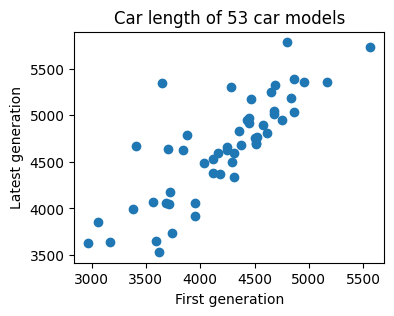

In [6]:
plt.figure(figsize=(4, 3))  
plt.scatter(first_generation['length'], latest_generation['length'])
plt.xlabel('First generation')
plt.ylabel('Latest generation')
plt.title('Car length of 53 car models')
plt.show()

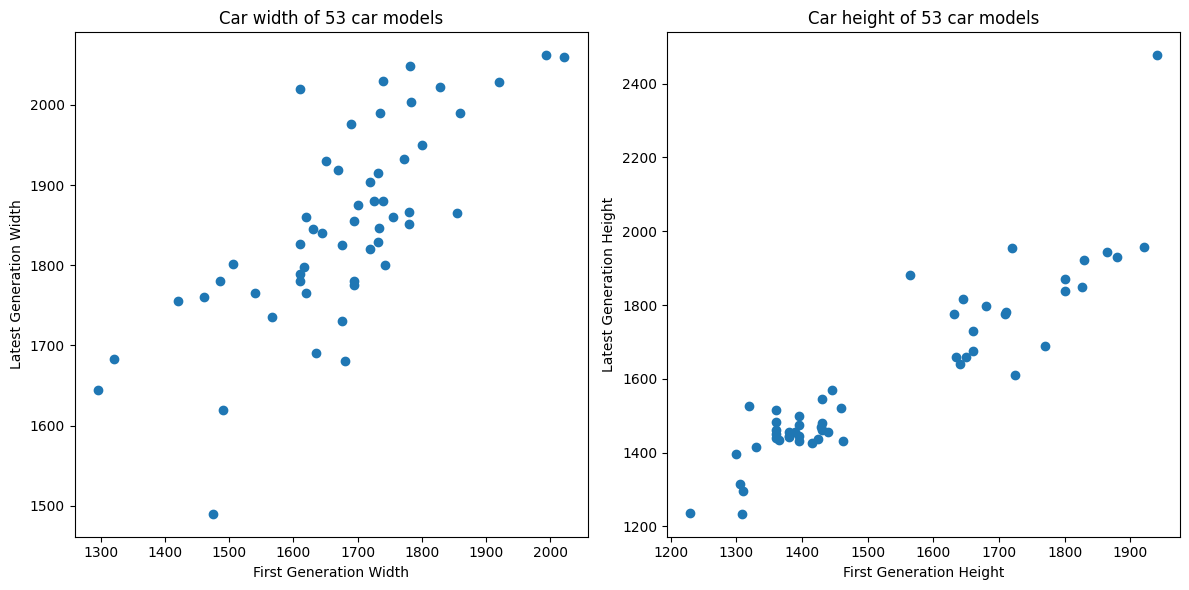

In [7]:
# Create paired scatter plots of car `width` and `height`
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(first_generation['width'], latest_generation['width'])
ax1.set_xlabel('First Generation Width')
ax1.set_ylabel('Latest Generation Width')
ax1.set_title('Car width of 53 car models')

ax2.scatter(first_generation['height'], latest_generation['height'])
ax2.set_xlabel('First Generation Height')
ax2.set_ylabel('Latest Generation Height')
ax2.set_title('Car height of 53 car models')

plt.tight_layout()
plt.show()

In [11]:
#Follow the Pro Tips.
def add_equality_line(ax):
    x = [1000,2000]
    y = [1000,2000]
    ax.plot(x, y, color='black', alpha=0.5, linestyle='--')

def square_the_plot(ax):
    plt.xlim(1000, 2000)
    plt.ylim(1000, 2000)
    ax.set_aspect(1)

#Add labels to datapoints to tell a story.
def add_labels(ax,df, x_col, y_col, label_col):
    for (i, row) in df.iterrows():
        x = row[x_col]
        y = row[y_col]
        offset_spacing = "  "
        label = offset_spacing + row[label_col]
        ax.text(x, y, label, va='center', ha='left')

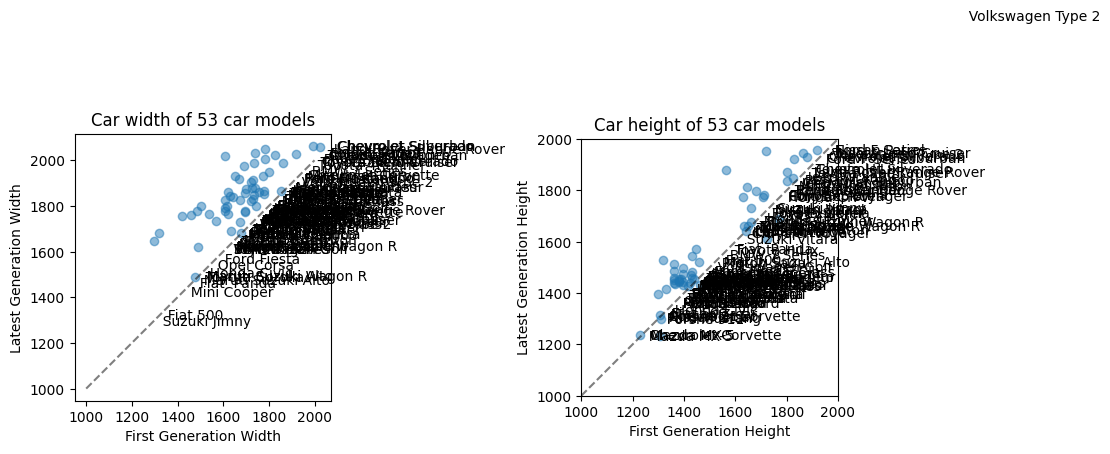

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(first_generation['width'], latest_generation['width'],alpha = 0.5)
ax1.set_xlabel('First Generation Width')
ax1.set_ylabel('Latest Generation Width')
ax1.set_title('Car width of 53 car models')
add_equality_line(ax1)
square_the_plot(ax1)
add_labels(ax1,first_generation, 'width', 'width', 'brand_model')
add_labels(ax1,latest_generation, 'width', 'width', 'brand_model')

ax2.scatter(first_generation['height'], latest_generation['height'],alpha = 0.5)
ax2.set_xlabel('First Generation Height')
ax2.set_ylabel('Latest Generation Height')
ax2.set_title('Car height of 53 car models')
add_equality_line(ax2)
square_the_plot(ax2)
add_labels(ax2,first_generation, 'height', 'height', 'brand_model')
add_labels(ax2,latest_generation, 'height', 'height', 'brand_model')

plt.tight_layout()
plt.show()

/tmp/ipykernel_16383/3045510808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_generation['footprint'] = first_generation['length'] * first_generation['width']
/tmp/ipykernel_16383/3045510808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_generation['footprint'] = latest_generation['length'] * latest_generation['width']


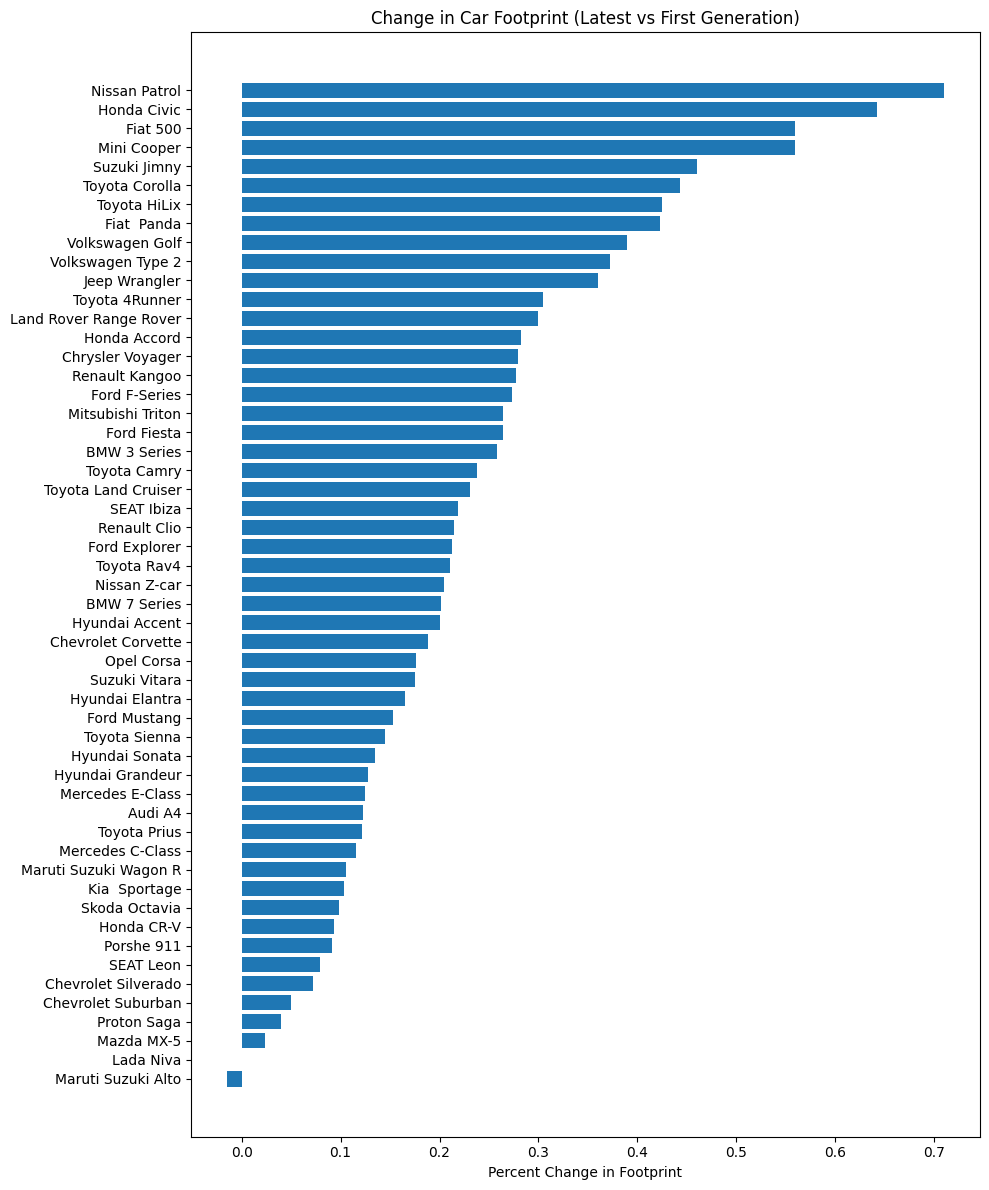

In [13]:
# Create new variables such as:
# car footprint = (length * width)
first_generation['footprint'] = first_generation['length'] * first_generation['width']
latest_generation['footprint'] = latest_generation['length'] * latest_generation['width']

# percent change = (latest - first) / first
footprint_change = (latest_generation['footprint'].values - first_generation['footprint'].values) / first_generation['footprint'].values

# Create horizontal bar plots showing which car models have changed the least or most for a variable of your choice.
plt.figure(figsize=(10, 12))
sorted_idx = footprint_change.argsort()
plt.barh(first_generation['brand_model'].values[sorted_idx], footprint_change[sorted_idx])
plt.xlabel('Percent Change in Footprint')
plt.title('Change in Car Footprint (Latest vs First Generation)')
plt.tight_layout()
plt.show()
